In [138]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drugs=pd.read_csv("data/mouse_drug_data.csv")
clinical_trial =pd.read_csv("data/clinicaltrial_data.csv")


# Combine the data into a single dataset
combined_df = pd.merge(mouse_drugs,clinical_trial, on="Mouse ID")
# Display the data table for preview
combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [139]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint and Convert to DataFrame
tumor_df = combined_df.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()
meantumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
# Preview DataFrame
meantumor_df

,Drug,Timepoint,Mean Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [140]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_vol = combined_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
# Convert to DataFrame
sem_vol_df = sem_vol.rename(columns={"Tumor Volume (mm3)": "Standard Error of Mean"})
# Preview DataFrame
sem_vol_df

,Drug,Timepoint,Standard Error of Mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [141]:
# Minor Data Munging to Re-Format the Data Frames
reformated_mean = meantumor_df.pivot(index="Timepoint",columns="Drug",values="Mean Tumor Volume") 
reformated_sem = sem_vol_df.pivot(index="Timepoint",columns="Drug",values="Standard Error of Mean") 
# Preview that Reformatting worked 
reformated_mean 


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


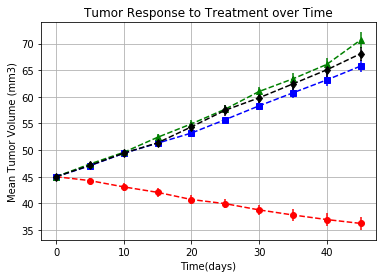

In [142]:
# Generate the Plot (with Error Bars)
times = reformated_mean.index
error1 = reformated_sem['Capomulin']
error2 = reformated_sem['Infubinol']
error3 = reformated_sem['Ketapril']
error4 = reformated_sem['Placebo']


plt.errorbar(times, reformated_mean['Capomulin'], yerr=error1, linestyle = "--", color = 'red', marker = 'o', label='Capomulin') 
plt.errorbar(times, reformated_mean['Infubinol'], yerr=error2, linestyle = "--", color='blue', marker = 's', label='Infubinol')
plt.errorbar(times, reformated_mean['Ketapril'], yerr=error3, linestyle = "--", color='green', marker = '^', label='Ketapril')
plt.errorbar(times, reformated_mean['Placebo'], yerr=error4, linestyle = "--", color='black', marker = 'd', label='Placebo') 

plt.title('Tumor Response to Treatment over Time')
plt.xlabel('Time(days)')
plt.ylabel('Mean Tumor Volume (mm3)') 
plt.grid()


In [143]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint, Convert to DataFrame
metastatic_group = combined_df.groupby(["Drug","Timepoint"], as_index=False)['Metastatic Sites'].mean()


# Preview DataFrame 

metastatic_group.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [144]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem = combined_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index()
# Convert to DataFrame_index(
metastatic_sem
# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [145]:
# Minor Data Munging to Re-Format the Data Frames
reformated_meta_mean = metastatic_group.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites") 
reformated_meta_sem = metastatic_sem.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
reformated_meta_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


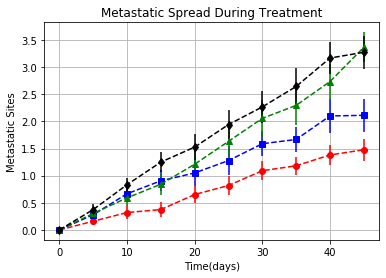

In [146]:
# Generate the Plot (with Error Bars)
meta_times = reformated_meta_mean.index
meta_error1 = reformated_meta_sem['Capomulin']
meta_error2 = reformated_meta_sem['Infubinol']
meta_error3 = reformated_meta_sem['Ketapril']
meta_error4 = reformated_meta_sem['Placebo']


plt.errorbar(meta_times, reformated_meta_mean['Capomulin'], yerr=meta_error1, linestyle = "--", color = 'red', marker = 'o', label='Capomulin') 
plt.errorbar(meta_times, reformated_meta_mean['Infubinol'], yerr=meta_error2, linestyle = "--", color='blue', marker = 's', label='Infubinol')
plt.errorbar(meta_times, reformated_meta_mean['Ketapril'], yerr=meta_error3, linestyle = "--", color='green', marker = '^', label='Ketapril')
plt.errorbar(meta_times, reformated_meta_mean['Placebo'], yerr=meta_error4, linestyle = "--", color='black', marker = 'd', label='Placebo') 

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time(days)')
plt.ylabel('Metastatic Sites') 
plt.grid()

In [147]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group = combined_df.groupby(["Drug","Timepoint"], as_index=False)['Mouse ID'].count()
# Convert to DataFrame
mouse_count = mice_group.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
mouse_count

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [148]:
# Minor Data Munging to Re-Format the Data Frames
reform_mouse_count = mouse_count.pivot(index="Timepoint",columns="Drug",values="Mouse Count") 
# Preview the Data Frame
reform_mouse_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


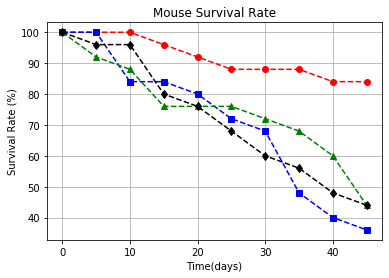

In [149]:
# Generate the Plot (with Error Bars)
survival_percent1 = (reform_mouse_count['Capomulin']/25)*100
survival_percent2 = (reform_mouse_count['Infubinol']/25)*100
survival_percent3 = (reform_mouse_count['Ketapril']/25)*100
survival_percent4 = (reform_mouse_count['Placebo']/25)*100

plt.errorbar(meta_times, survival_percent1, linestyle = "--", color = 'red', marker = 'o', label='Capomulin') 
plt.errorbar(meta_times, survival_percent2, linestyle = "--", color='blue', marker = 's', label='Infubinol')
plt.errorbar(meta_times, survival_percent3, linestyle = "--", color='green', marker = '^', label='Ketapril')
plt.errorbar(meta_times, survival_percent4, linestyle = "--", color='black', marker = 'd', label='Placebo') 

plt.title('Mouse Survival Rate')
plt.xlabel('Time(days)')
plt.ylabel('Survival Rate (%)') 
plt.grid()

In [150]:
# Calculate the percent changes for each drug
beginningVol = reformated_mean.iloc[0]
endingVol = reformated_mean.iloc[-1]
percentChange = ((endingVol-beginningVol)/beginningVol)*100
percentChange

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

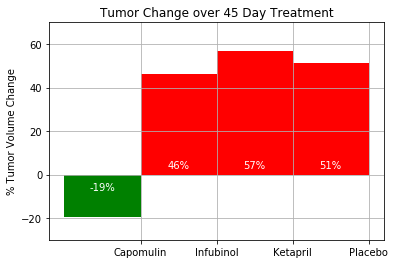

In [152]:
# Store all Relevant Percent Changes into a Tuple
passing = percentChange < 0

# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percentChange[drug]) for drug in drug_list]
change_plt = plt.bar(drug_list, change_list, width=-1, align='edge', color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def labelplot(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
labelplot(change_plt)


# Show the Figure
plt.show()